In [1]:
# This program predicts stock prices by using machine learning models

#Install the dependencies
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
#Get the stock data
df = pd.read_csv('MSFT_5yr_data.csv')
df.set_index('date', inplace=True)
# Take a look at the data
#print(df.head())
df.head(7)

,high,low,open,close,volume,adjclose,ticker
date,,,,,,,
12/3/2014,48.500000,47.810001,48.439999,48.080002,23534800,43.164230,MSFT
12/4/2014,49.060001,48.200001,48.389999,48.840000,30320400,43.846523,MSFT
12/5/2014,48.970001,48.380001,48.820000,48.419998,27313400,43.469467,MSFT
12/8/2014,48.349998,47.450001,48.259998,47.700001,26663100,42.823078,MSFT
12/9/2014,47.919998,47.049999,47.110001,47.590000,24330500,42.724323,MSFT
12/10/2014,47.660000,46.700001,47.580002,46.900002,30431800,42.104874,MSFT
12/11/2014,47.740002,46.680000,47.080002,47.169998,29060400,42.347267,MSFT


In [3]:
# Get the Adjusted Close Price
df = df[['close']]
#Take a look at the new data
print(df.head())

               close
date                
12/3/2014  48.080002
12/4/2014  48.840000
12/5/2014  48.419998
12/8/2014  47.700001
12/9/2014  47.590000


In [4]:
# A variable for predicting 'n' days out into the future
forecast_out = 30 #'n=30' days
#Create another column (the target or dependent variable) shifted 'n' units up
df['Prediction'] = df[['close']].shift(-forecast_out)
#print the new data set
print(df.tail())

                 close  Prediction
date                              
11/27/2019  152.320007         NaN
11/29/2019  151.380005         NaN
12/2/2019   149.550003         NaN
12/3/2019   149.309998         NaN
12/4/2019   149.850006         NaN


In [5]:
### Create the independent data set (X)  #######
# Convert the dataframe to a numpy array
X = np.array(df.drop(['Prediction'],1))

#Remove the last 'n' rows
X = X[:-forecast_out]
print(X)

[[ 48.08000183]
 [ 48.84000015]
 [ 48.41999817]
 ...
 [137.4100037 ]
 [138.4299927 ]
 [136.3699951 ]]


In [6]:
### Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array (All of the values including the NaN's)
y = np.array(df['Prediction'])
# Get all of the y values except the last 'n' rows
y = y[:-forecast_out]
print(y)

[ 46.24000168  46.38999939  45.91999817 ... 149.5500031  149.3099976
 149.8500061 ]


In [7]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
# Create and train the Support Vector Machine (Regressor)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [9]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.9792619709464426


In [10]:
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.9772337584715298


In [12]:
# Set x_forecast equal to the last 30 rows of the original data set from Close column
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast)

[[137.2400055]
 [139.9400024]
 [140.7299957]
 [144.1900024]
 [142.8300018]
 [144.6100006]
 [143.3699951]
 [143.7200012]
 [144.5500031]
 [144.4600067]
 [144.0599976]
 [144.2599945]
 [145.9600067]
 [146.1100006]
 [147.0700073]
 [147.3099976]
 [148.0599976]
 [149.9700012]
 [150.3399963]
 [150.3899994]
 [149.6199951]
 [149.4799957]
 [149.5899963]
 [151.2299957]
 [152.0299988]
 [152.3200073]
 [151.3800049]
 [149.5500031]
 [149.3099976]
 [149.8500061]]


In [13]:
# Print linear regression model predictions for the next 'n' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)

# Print support vector regressor model predictions for the next 'n' days
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

[141.84893917 144.64895127 145.46820806 149.05638279 147.64600408
 149.49193886 148.20600019 148.56897147 149.42971889 149.33638878
 148.92156226 149.12896758 150.89195284 151.04750292 152.04307087
 152.29195106 153.0697331  155.05048841 155.43418913 155.48604448
 154.68751713 154.54233177 154.65640709 156.35715652 157.1867939
 157.4875451  156.51272246 154.61493244 154.36603648 154.92604836]
[137.8074682  139.67044055 140.90733657 169.29959238 168.45311326
 162.81453955 172.85503794 172.93177427 163.89924651 165.43467396
 170.71948288 168.41200368 132.17305612 128.81023569 111.29555759
 108.16532083 101.34040212  96.03413005  95.83928189  95.82024829
  96.34132238  96.51117752  96.37511677  95.65014734  95.61024449
  95.60538904  95.63780002  96.42231857  96.76362791  96.12316785]


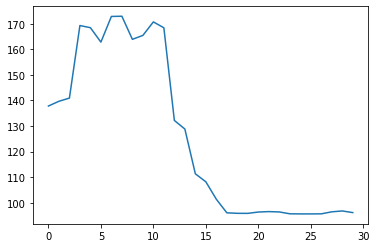

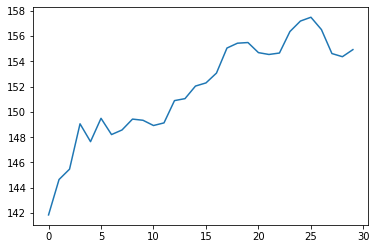

In [14]:
# This should be the [close] forcatination start at 12/5
plt.plot(svm_prediction)
plt.show()

plt.plot(lr_prediction)
plt.show()

In [18]:
type(lr_prediction)

numpy.ndarray

In [19]:
df = pd.DataFrame(lr_prediction)
df

,0
0,141.848939
1,144.648951
2,145.468208
3,149.056383
4,147.646004
5,149.491939
6,148.206000
7,148.568971
8,149.429719
9,149.336389
